# Тема “Обучение без учителя”
### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [3]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [10]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

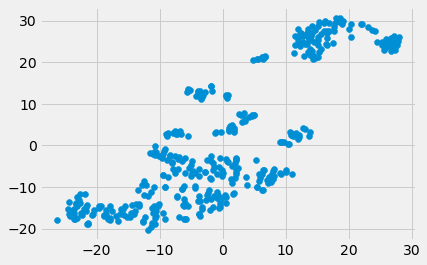

In [13]:
plt.style.use('fivethirtyeight')
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [16]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

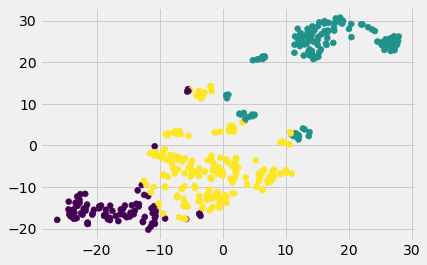

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [25]:
print('Среднее значение price в кластере 0: {}'.format(y_train[labels_train == 0].mean()))
print('Среднее значение price в кластере 1: {}'.format(y_train[labels_train == 1].mean()))
print('Среднее значение price в кластере 2: {}'.format(y_train[labels_train == 2].mean()))

Среднее значение price в кластере 0: 27.78837209302326
Среднее значение price в кластере 1: 16.165354330708663
Среднее значение price в кластере 2: 24.958115183246072


In [19]:
print('Среднее значение CRIM в кластере 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Среднее значение CRIM в кластере 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Среднее значение CRIM в кластере 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Среднее значение CRIM в кластере 0: 0.07356558139534886
Среднее значение CRIM в кластере 1: 10.797028425196853
Среднее значение CRIM в кластере 2: 0.42166020942408367


### * Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [26]:
labels_test = kmeans.predict(X_test_scaled)

In [31]:
print('Среднее значение price в кластере 0: {}'.format(y_test[labels_test == 0].mean()))
print('Среднее значение price в кластере 0: {}'.format(y_test[labels_test == 1].mean()))
print('Среднее значение price в кластере 0: {}'.format(y_test[labels_test == 2].mean()))

Среднее значение price в кластере 0: 31.35
Среднее значение price в кластере 0: 16.43714285714286
Среднее значение price в кластере 0: 21.860784313725492


In [33]:
print('Среднее значение CRIM в кластере 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Среднее значение CRIM в кластере 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Среднее значение CRIM в кластере 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Среднее значение CRIM в кластере 0: 0.062060000000000004
Среднее значение CRIM в кластере 1: 10.165531142857143
Среднее значение CRIM в кластере 2: 0.26607882352941176
